In [1]:
pip install pandas

In [ ]:
pip install requests beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import zipfile
from google.colab import files
#https://www.ree.es/sites/default/files/11_PUBLICACIONES/Documentos/demanda_noviembre_2023.xlsx
#https://www.ree.es/sites/default/files/11_PUBLICACIONES/Documentos/demanda_diciembre_2023.xlsx
meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
años = ['2022','2023','2024']

# Nombre del archivo zip
zip_filename = 'dataset_TFM.zip'

#https://www.ree.es/es/datos/publicaciones/boletines-mensuales/boletin-mensual-noviembre-2023
base = 'https://www.ree.es'
urlbase = 'https://www.ree.es/es/datos/publicaciones/boletines-mensuales/boletin-mensual-'
link_base = "https://www.ree.es/sites/default/files/11_PUBLICACIONES/Documentos/demanda_" #para el href del excel
salir = False
archivos = []

for año in años:
  for mes in meses:
      url = urlbase + mes + '-' + año
      link_href = link_base + '_' + mes + '_' + año + '.xlsx'
      terminacion = 'demanda' + '_' + mes + '_' + año + '.xlsx'
      if mes == 'mayo' and año == '2024':
        salir = True
        break
      pagina = requests.get(url)
      pagina.raise_for_status()

      # Analizar el HTML
      soup = BeautifulSoup(pagina.content, 'html.parser')

      links = soup.find_all('a', href=True)

      # Filtrar el enlace específico
      excel_url = None
      for link in links:
         #Para cada enlace (link), se extrae el valor del atributo href, que contiene la URL relativa del recurso al que apunta el enlace.
         href = link['href']
         if terminacion in href:
           excel_url = base + href
           break

      if excel_url:
        # Descargar el archivo Excel
        pagina = requests.get(excel_url)
        pagina.raise_for_status()

        # Guardar el archivo en el disco
        filename = terminacion
        #añado los ficheros a la lista archivos
        archivos.append(filename)
        with open(filename, 'wb') as file:
          file.write(pagina.content)

      else:
          print(f"No se encontró el enlace del archivo Excel: {terminacion}")
  if salir:
    break
# Crear un archivo zip y agregar archivos a él
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    #recorro la lista de ficheros y los comprimo
    for archivo in archivos:
        zipf.write(archivo)

# Descargar el archivo zip
files.download(zip_filename)



No se encontró el enlace del archivo Excel: demanda_enero_2022.xlsx
No se encontró el enlace del archivo Excel: demanda_febrero_2022.xlsx
No se encontró el enlace del archivo Excel: demanda_marzo_2022.xlsx
No se encontró el enlace del archivo Excel: demanda_abril_2022.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
pip install pandas openpyxl


In [ ]:
# Nombre del fichero
fichero = "demanda_enero_2023"

# Verificar si contiene la palabra "enero"
if 'enero' in fichero.lower():
    print(f"El fichero '{fichero}' contiene la palabra 'enero'")
else:
    print(f"El fichero '{fichero}' no contiene la palabra 'enero'")


El fichero 'demanda_enero_2023' contiene la palabra 'enero'


In [3]:
#para ver si el año de febrero es bisiesto, ya que estoy cogiendo 'x' número de filas de los excels dependiendo de cuantos dias tenga el mes
def es_bisiesto(anio):
    if (anio % 4 == 0 and anio % 100 != 0) or (anio % 400 == 0):
        return True
    else:
        return False

def get_mes(fichero):
  año = fichero[-9:-5]
  fichero = fichero[8:-10]
  n_dias = 0

  match fichero:
    case 'enero':
      n_dias +=31
      return n_dias
    case 'febrero':
      bisiesto = es_bisiesto(int(año))
      if bisiesto == True:
        n_dias +=29
        return n_dias
      else:
        n_dias+= 28
        return n_dias
    case 'marzo':
      n_dias+= 31
      return n_dias
    case 'abril':
      n_dias+= 30
      return n_dias
    case 'mayo':
      n_dias+= 31
      return n_dias
    case 'junio':
      n_dias +=30
      return n_dias
    case 'julio':
      n_dias+= 31
      return n_dias
    case 'agosto':
      n_dias+= 31
      return n_dias
    case 'septiembre':
      n_dias+= 30
      return n_dias
    case 'octubre':
      n_dias+= 31
      return n_dias
    case 'noviembre':
      n_dias+= 30
      return n_dias
    case 'diciembre':
      n_dias+= 31
      return n_dias

In [ ]:

import pandas as pd
import zipfile
import os

# Ruta del archivo ZIP
zip_path = '/content/dataset_TFM.zip'

# Directorio temporal para extraer los archivos Excel
temp_dir = '/content/dataset_TFM'

# Crear el directorio temporal si no existe
if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

# Extraer los archivos del ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

# Nombre del archivo donde se guardarán las tablas extraídas
archivo_salida = 'tablas_extraidas.xlsx'

# Lista para almacenar las tablas extraídas
tablas = []

# Recorrer todos los archivos en el directorio temporal
for archivo in os.listdir(temp_dir):
    if archivo.endswith('.xlsx'):
        # Construir la ruta completa del archivo
        ruta_archivo = os.path.join(temp_dir, archivo)
        # Leer la hoja 8 del archivo Excel
        df = pd.read_excel(ruta_archivo, sheet_name='Dat_01')  # De todas las hojas me quedo con la que se llama Dat_01
        n_filas = get_mes(archivo)

        print(n_filas)
        # Extraer las columnas deseadas
        tabla = df.iloc[127:127+n_filas, [0, 3]]  # La columna 0 es "fecha" y la columna 3 es "demanda diaria"
        tabla.columns = ['Fecha', 'Demanda diaria']  # Renombrar columnas si es necesario

        temperatura_media = df.iloc[50:50+n_filas, 2].values
        tabla['Temperatura Media'] = temperatura_media
        #tabla.to_excel(archivo, index=False)
        # Añadir la tabla a la lista de tablas
        tablas.append(tabla)

# Concatenar todas las tablas en un único DataFrame
resultado = pd.concat(tablas, ignore_index=True)
# Limpiar y estandarizar las fechas
resultado['Fecha'] = resultado['Fecha'].str.replace(r'[^0-9/]', '', regex=True)  # Eliminar caracteres no numéricos

resultado['Fecha'] = pd.to_datetime(resultado['Fecha'],dayfirst=True, infer_datetime_format=True, errors='coerce')
resultado['Fecha'] = resultado['Fecha'].dt.date
resultado = resultado.sort_values(by='Fecha', ascending=True)

# Guardar el DataFrame resultante en un nuevo archivo Excel
resultado.to_excel(archivo_salida, index=False)


print(f'Tablas extraídas y guardadas en {archivo_salida}')


31
30
31
28
30
31
30
30
31
30
31
31
31
31
31
31
30
30
30
31
29
31
31
31
Tablas extraídas y guardadas en tablas_extraidas.xlsx


<ipython-input-108-8105e151a4c4>:49: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  resultado['Fecha'] = pd.to_datetime(resultado['Fecha'],dayfirst=True, infer_datetime_format=True, errors='coerce')


In [ ]:
nombreprueba = 'demanda_febrero_2024.xlsx'
print(nombreprueba[-9:-5])
print(nombreprueba[8:-10])
filas = get_mes(nombreprueba)
print(filas)

2024
febrero
29


In [ ]:
print(resultado)

          Fecha Demanda diaria Temperatura Media
426  2022-05-01     493.756161            17.265
427  2022-05-02     576.021278             15.75
428  2022-05-03     639.114894            14.982
429  2022-05-04     648.186865            15.111
430  2022-05-05     641.795816            16.554
..          ...            ...               ...
206  2024-04-26     629.530886             13.78
207  2024-04-27     566.587462            14.097
208  2024-04-28     525.670595            13.197
209  2024-04-29     625.915648            13.272
210  2024-04-30     618.569213            14.247

[731 rows x 3 columns]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files
import io #se usa para manejar la entrada/salida de datos en forma de bytes.

In [5]:

seed = 42  # Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles.

def upload_files(index_fields=None):
  #Esta línea abre un cuadro de diálogo en el navegador para que el usuario seleccione uno o varios archivos para cargar. uploaded es un diccionario donde las claves son los nombres de los archivos y los valores son los contenidos de los archivos en forma de bytes.
    uploaded = files.upload()  # Abre un cuadro de diálogo para cargar archivos desde tu computadora
    for fn in uploaded.keys():  # Itera sobre los archivos cargados
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))  # Imprime el nombre y tamaño del archivo cargado
        df = pd.read_excel(io.BytesIO(uploaded[fn]), index_col=index_fields)  # Lee el archivo .xlsx en un DataFrame de pandas
        return df  # Retorna el DataFrame

In [6]:
# Subir el conjunto de datos
dataset = upload_files()
print(dataset.shape)
dataset.head()

Saving tablas_completas.xlsx to tablas_completas.xlsx
User uploaded file "tablas_completas.xlsx" with length 24628 bytes
(731, 3)


,Fecha,Demanda diaria,Temperatura Media
0,2022-05-01,493.756161,17.265
1,2022-05-02,576.021278,15.750
2,2022-05-03,639.114894,14.982
3,2022-05-04,648.186865,15.111
4,2022-05-05,641.795816,16.554


# PREPROCESAMIENTO

In [ ]:
print(dataset.dtypes)

Fecha                datetime64[ns]
Demanda diaria              float64
Temperatura Media           float64
dtype: object


In [7]:
dataset['Día'] = dataset['Fecha'].dt.day
dataset['Mes'] = dataset['Fecha'].dt.month
dataset['Año'] = dataset['Fecha'].dt.year

In [8]:
dataset.head(3)

,Fecha,Demanda diaria,Temperatura Media,Día,Mes,Año
0,2022-05-01,493.756161,17.265,1,5,2022
1,2022-05-02,576.021278,15.750,2,5,2022
2,2022-05-03,639.114894,14.982,3,5,2022


In [ ]:
dataset.dtypes

,0
Fecha,datetime64[ns]
Demanda diaria,float64
Temperatura Media,float64
Día,int32
Mes,int32
Año,int32


In [9]:
dict_meses ={
    1:'enero',
    2:'febrero',
    3:'marzo',
    4:'abril',
    5:'mayo',
    6:'junio',
    7:'julio',
    8:'agosto',
    9:'septiembre',
    10:'octubre',
    11:'noviembre',
    12:'diciembre'
}

**PARA TENER UN DICCIONARIO CON LAS TEMPERATURAS MÁXIMAS Y MÍNIMAS DE CADA MES**

In [10]:

inicio=0
final = 0
for i in range(0,len(dataset)):
  if dataset.loc[i,'Año']== 2023 :
    inicio = i
    break
for i in range(inicio,len(dataset)):
  if dataset.loc[i,'Año']== 2024:
    final = i
    break
temperaturas = {}
n_dias = 0
j = inicio
while j <= final:
  match dict_meses[dataset.loc[j,'Mes']]:
    case 'enero':
      n_dias =31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'febrero':
      n_dias = 0
      año = 2023
      bisiesto = es_bisiesto(int(año))
      if bisiesto == True:
        n_dias +=29

      else:
        n_dias+= 28
      aux = []
      aux2 = []
      for d in range(j, j+ n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])

      aux2.append(max(aux))
      aux2.append(min(aux))
      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'marzo':

      n_dias =31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'abril':
      n_dias= 30

      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'mayo':
      n_dias= 31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'junio':
      n_dias =30
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'julio':
      n_dias= 31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'agosto':
      n_dias= 31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'septiembre':
      n_dias= 30
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'octubre':
      n_dias= 31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'noviembre':
      n_dias= 30
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      j+=n_dias

    case 'diciembre':
      n_dias= 31
      aux = []
      aux2 = []
      for d in range(j, j+n_dias):
        aux.append(dataset.loc[d,'Temperatura Media'])
      aux2.append(max(aux))
      aux2.append(min(aux))

      temperaturas[dict_meses[dataset.loc[j,'Mes']]] = aux2
      print(temperaturas)
      j+=n_dias




{'enero': [12.7, 5.511], 'febrero': [13.221, 5.552], 'marzo': [18.031, 5.588], 'abril': [21.127, 13.044], 'mayo': [20.984, 15.467], 'junio': [26.446, 19.748], 'julio': [27.867, 23.777], 'agosto': [30.471, 21.245], 'septiembre': [24.678, 18.795], 'octubre': [23.98, 14.436], 'noviembre': [18.139, 10.692], 'diciembre': [14.92, 7.534]}


In [ ]:

# Voy a ver los outliers del dataset mediante los rangos intercuartílicos
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers utilizando el método del rango intercuartílico
outliers = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
print(outliers.sum())

Fecha                0
Demanda diaria       1
Temperatura Media    0
Día                  0
Mes                  0
Año                  0
dtype: int64


Realmente no es un outlier como tal, probablemente se debe a una disminución o aumento de la demanda provocado por algo puntual.

In [ ]:
dataset.describe()

,Fecha,Demanda diaria,Temperatura Media,Día,Mes,Año
count,731,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2023-05-01 00:00:00.000000256,631.500371,17.713010,15.738714,6.519836,2022.830369
min,2022-05-01 00:00:00,455.331900,5.511000,1.000000,1.000000,2022.000000
25%,2022-10-30 12:00:00,591.569472,12.627500,8.000000,4.000000,2022.000000
50%,2023-05-01 00:00:00,629.530886,17.241000,16.000000,7.000000,2023.000000
75%,2023-10-30 12:00:00,676.216036,22.690000,23.000000,10.000000,2023.000000
max,2024-04-30 00:00:00,783.506111,30.471000,31.000000,12.000000,2024.000000
std,NaN,65.944834,6.097003,8.809949,3.451913,0.687427


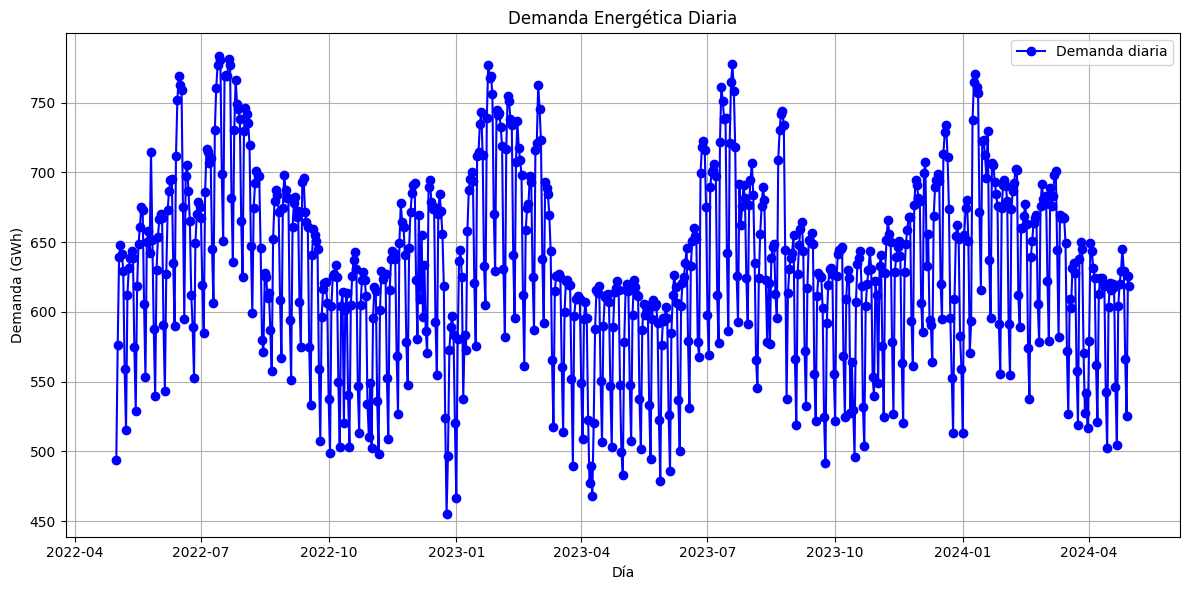

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dataset['Fecha'], dataset['Demanda diaria'], marker='o', linestyle='-', color='b', label='Demanda diaria')
plt.title('Demanda Energética Diaria')
plt.xlabel('Día')
plt.ylabel('Demanda (GWh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


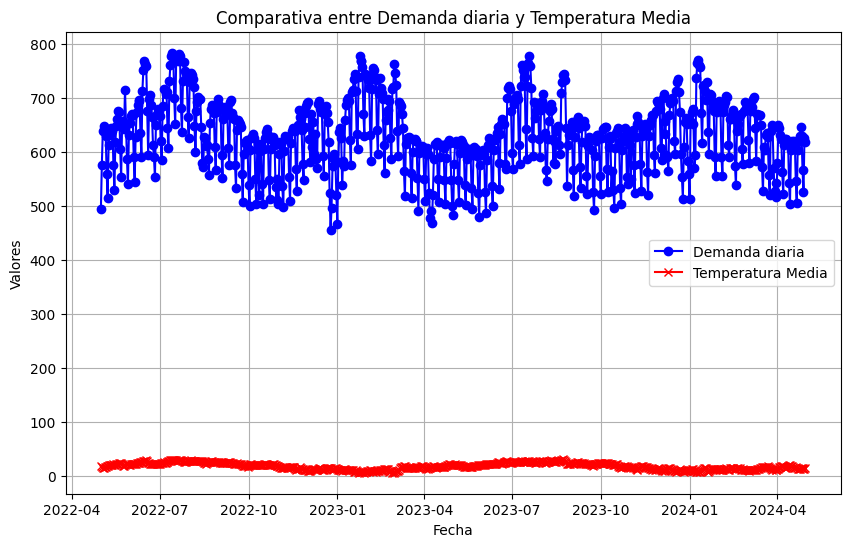

In [ ]:
# Crear una figura y un conjunto de ejes
plt.figure(figsize=(10, 6))

# Graficar la columna 'Demanda diaria'
plt.plot(dataset['Fecha'], dataset['Demanda diaria'], label='Demanda diaria', color='blue', marker='o')

# Graficar la columna 'Temperatura Media'
plt.plot(dataset['Fecha'], dataset['Temperatura Media'], label='Temperatura Media', color='red', marker='x')

# Añadir títulos y etiquetas
plt.title('Comparativa entre Demanda diaria y Temperatura Media')
plt.xlabel('Fecha')
plt.ylabel('Valores')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [ ]:
dataset.describe()

,Fecha,Demanda diaria,Temperatura Media,Día,Mes,Año
count,731,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2023-05-01 00:00:00.000000256,631.500371,17.713010,15.738714,6.519836,2022.830369
min,2022-05-01 00:00:00,455.331900,5.511000,1.000000,1.000000,2022.000000
25%,2022-10-30 12:00:00,591.569472,12.627500,8.000000,4.000000,2022.000000
50%,2023-05-01 00:00:00,629.530886,17.241000,16.000000,7.000000,2023.000000
75%,2023-10-30 12:00:00,676.216036,22.690000,23.000000,10.000000,2023.000000
max,2024-04-30 00:00:00,783.506111,30.471000,31.000000,12.000000,2024.000000
std,NaN,65.944834,6.097003,8.809949,3.451913,0.687427


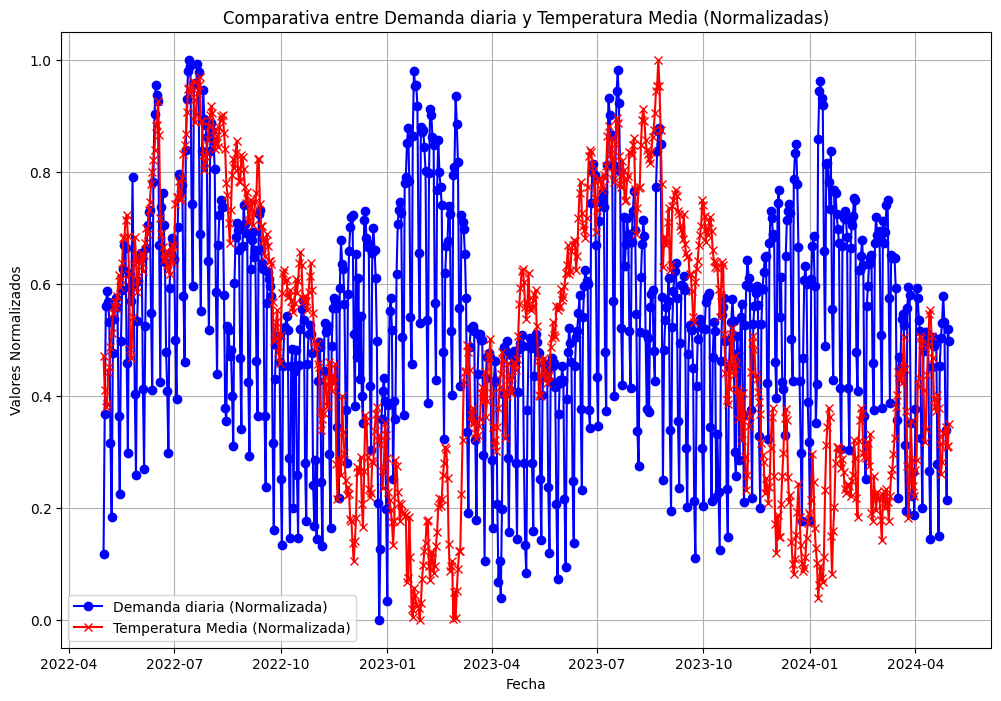

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Normalizar las columnas 'Demanda diaria' y 'Temperatura Media'
dataset[['Demanda diaria Normalizada', 'Temperatura Media Normalizada']] = scaler.fit_transform(dataset[['Demanda diaria', 'Temperatura Media']])

# Crear una figura y un conjunto de ejes
plt.figure(figsize=(12, 8))
# Graficar la columna 'Demanda diaria Normalizada'
plt.plot(dataset['Fecha'], dataset['Demanda diaria Normalizada'], label='Demanda diaria (Normalizada)', color='blue', marker='o')
# Graficar la columna 'Temperatura Media Normalizada'
plt.plot(dataset['Fecha'], dataset['Temperatura Media Normalizada'], label='Temperatura Media (Normalizada)', color='red', marker='x')

# Añadir títulos y etiquetas
plt.title('Comparativa entre Demanda diaria y Temperatura Media (Normalizadas)')
plt.xlabel('Fecha')
plt.ylabel('Valores Normalizados')
plt.legend()
plt.grid(True)
plt.show()


De aquí podemos deducir que cuando más demanda energética hay es cuando la temperatura media alcanza máximos y mínimos, es decir en las estaciones de invierno y verano, debido a que son la época del año en la que se pone más la calefacción y el aire acondicionado respectivamente.

In [ ]:
fecha = dataset.iloc[300]['Fecha']
print(f"La fecha en la posición {300} es {fecha}")
fecha2 = dataset.iloc[600]['Fecha']
print(f"La fecha en la posición {600} es {fecha2}")
fecha3 = dataset.iloc[90]['Fecha']
print(f"La fecha en la posición {90} es {fecha3}")
fecha4 = dataset.iloc[460]['Fecha']
print(f"La fecha en la posición {460} es {fecha4}")

La fecha en la posición 300 es 2023-02-25 00:00:00
La fecha en la posición 600 es 2023-12-22 00:00:00
La fecha en la posición 90 es 2022-07-30 00:00:00
La fecha en la posición 460 es 2023-08-04 00:00:00


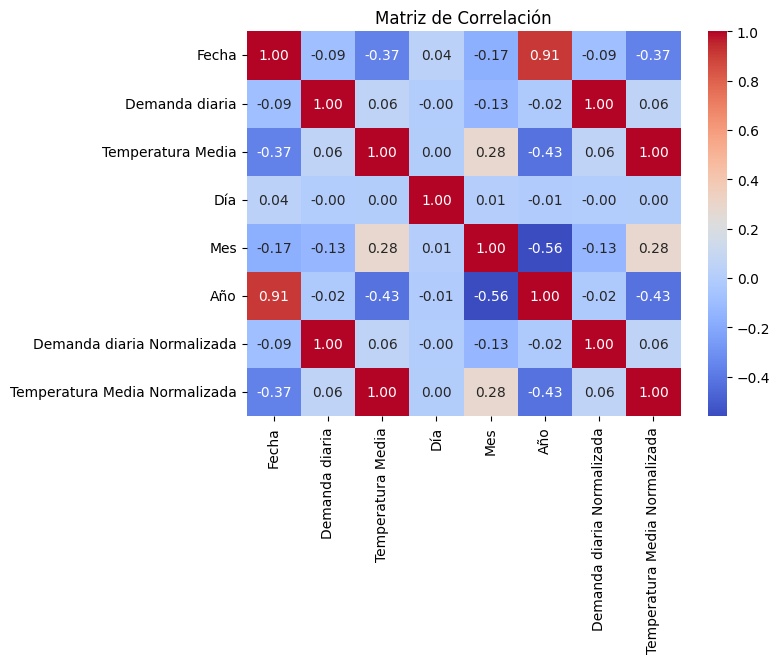

In [12]:
#Voy a sacar la matriz de correlación para eliminar las variables altamente correlacionadas, puesto que esto perjudicaría al estudio del dataset

import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = dataset.corr()

# Plotear el mapa de calor
plt.figure(figsize=(7, 5))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')  # Título del gráfico
plt.show()


Sé que la temperatura media y la demanda diaria están más correlacionados de lo que aparece en la matriz de correlación, voy a separar el dataset por las estaciones del año para ver si la correlación aumenta en ciertas estaciones del año


In [ ]:

# Función para asignar la estación del año
def asignar_estacion(fecha):
    mes_dia = (fecha.month, fecha.day)
    if (mes_dia >= (3, 21)) and (mes_dia <= (6, 20)):
        return 'Primavera'
    elif (mes_dia >= (6, 21)) and (mes_dia <= (9, 22)):
        return 'Verano'
    elif (mes_dia >= (9, 23)) and (mes_dia <= (12, 20)):
        return 'Otoño'
    else:
        return 'Invierno'

# Crear una nueva columna con la estación
dataset['Estacion'] = dataset['Fecha'].apply(asignar_estacion)

primavera = dataset[dataset['Estacion'] == 'Primavera']
verano = dataset[dataset['Estacion'] == 'Verano']
otoño = dataset[dataset['Estacion'] == 'Otoño']
invierno = dataset[dataset['Estacion'] == 'Invierno']

# Verifica que la nueva columna se ha agregado correctamente
print(dataset.head())


       Fecha  Demanda diaria  Temperatura Media  Día  Mes   Año   Estacion
0 2022-05-01      493.756161             17.265    1    5  2022  Primavera
1 2022-05-02      576.021278             15.750    2    5  2022  Primavera
2 2022-05-03      639.114894             14.982    3    5  2022  Primavera
3 2022-05-04      648.186865             15.111    4    5  2022  Primavera
4 2022-05-05      641.795816             16.554    5    5  2022  Primavera


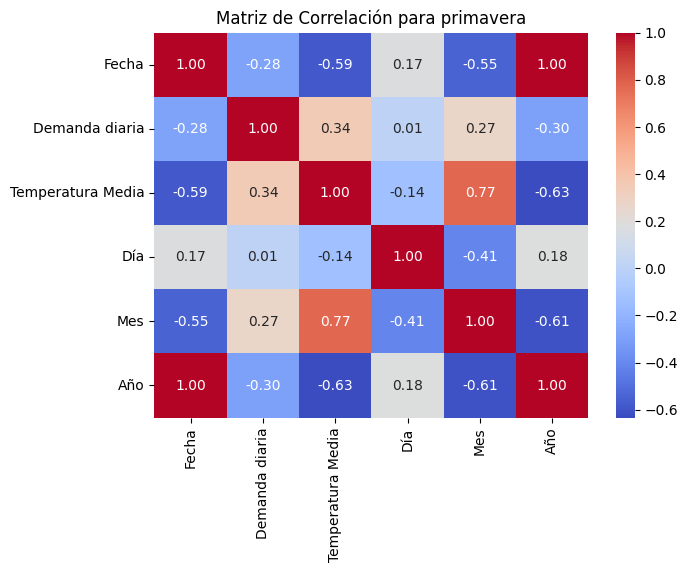

In [ ]:
columnas_corr = ['Fecha', 'Demanda diaria', 'Temperatura Media', 'Día','Mes','Año']

# Calcula la matriz de correlación
correlation_matrix = primavera[columnas_corr].corr()

# Plotear el mapa de calor
plt.figure(figsize=(7, 5))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para primavera')  # Título del gráfico
plt.show()


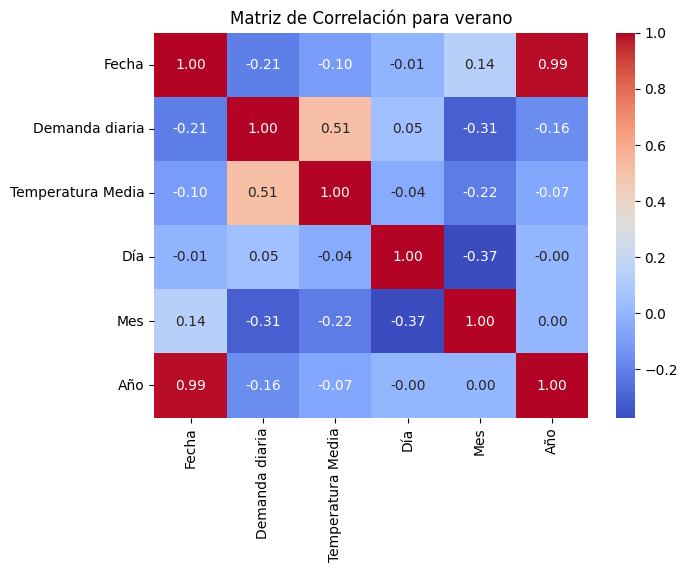

In [ ]:

# Calcula la matriz de correlación
correlation_matrix = verano[columnas_corr].corr()

# Plotear el mapa de calor
plt.figure(figsize=(7, 5))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para verano')  # Título del gráfico
plt.show()

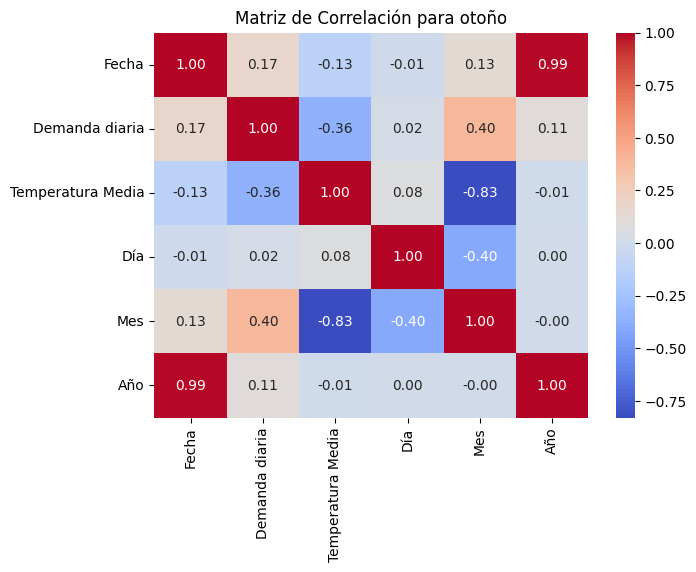

In [ ]:

# Calcula la matriz de correlación
correlation_matrix = otoño[columnas_corr].corr()

# Plotear el mapa de calor
plt.figure(figsize=(7, 5))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para otoño')  # Título del gráfico
plt.show()

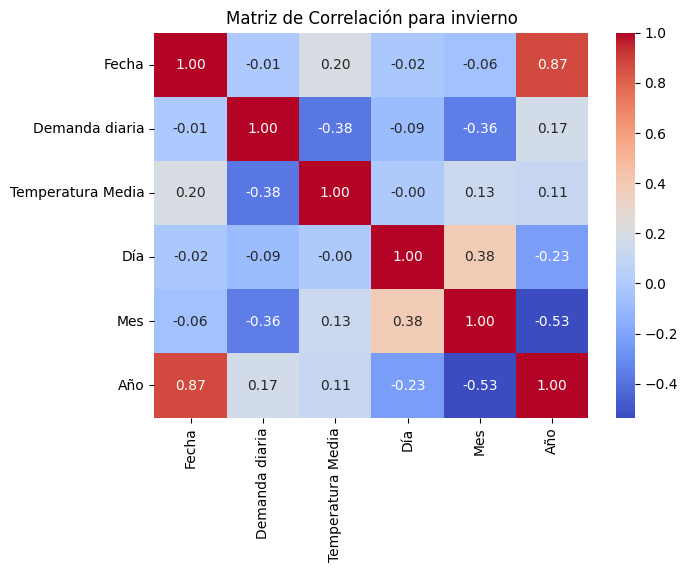

In [ ]:
columnas_corr = ['Fecha', 'Demanda diaria', 'Temperatura Media', 'Día','Mes','Año']

# Calcula la matriz de correlación
correlation_matrix = invierno[columnas_corr].corr()

# Plotear el mapa de calor
plt.figure(figsize=(7, 5))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para invierno')  # Título del gráfico
plt.show()

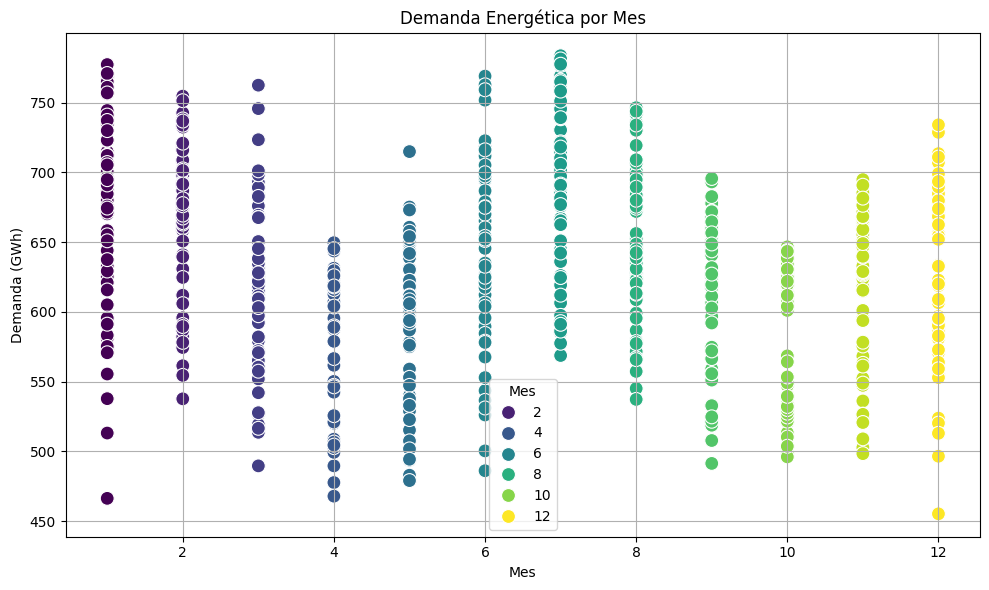

In [ ]:
import seaborn as sns

# Extraer el mes y el año de la columna de fechas
#datset['Month'] = df.index.month

# Plot usando Seaborn para agregar color y estilo automáticamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Mes', y='Demanda diaria', hue='Mes', palette='viridis', s=100)
plt.title('Demanda Energética por Mes')
plt.xlabel('Mes')
plt.ylabel('Demanda (GWh)')
plt.legend(title='Mes')
plt.grid(True)
plt.tight_layout()
plt.show()


Aquí podemos ver que hay mucha varianza en cuanto a la demanda energética en todos los meses, eso es que, la diferencia entre los valores de demanda entre un día y otro del mismo mes, es elevada. También podemos observar que en Abril y Octubre es en los meses donde menos demanda hay, esto puede deberse en que no hace ni frío ni calor y no hace falta poner calefacción ni aire acondicionado.

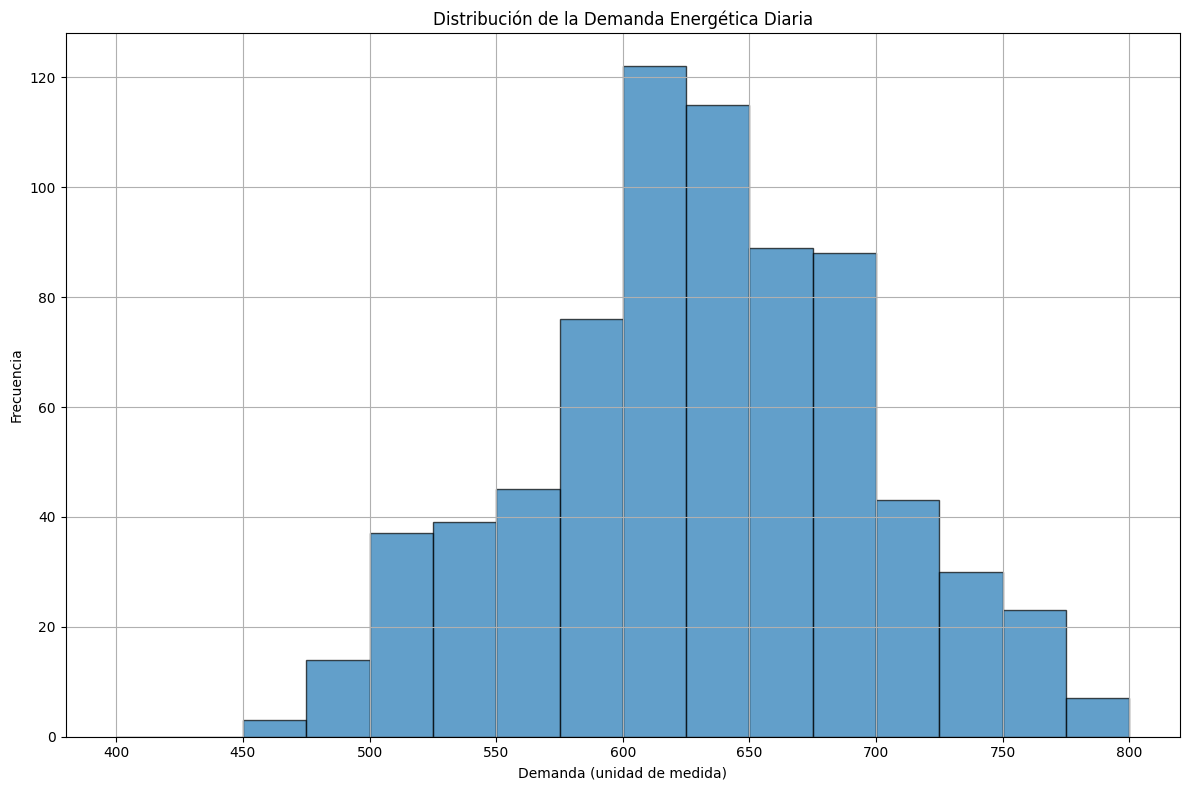

In [ ]:
plt.figure(figsize=(12, 8))
bins = [400,425,450,475,500,525,550,575,600,625,650,675,700,725,750,775,800]
plt.hist(dataset['Demanda diaria'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribución de la Demanda Energética Diaria')
plt.xlabel('Demanda (unidad de medida)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcular la media
media = dataset['Demanda diaria'].mean()
print(f"La media de la demanda diaria es: {media}")
media_t = dataset['Temperatura Media'].mean()
print(f"La media de la Temperatura media diaria es: {media_t}")

# Calcular la moda
dataset['Demanda diaria redondeada'] = dataset['Demanda diaria'].round()
moda = dataset['Demanda diaria redondeada'].mode()
dataset['Temperatura media diaria redondeada'] = dataset['Temperatura Media'].round()
moda_t = dataset['Temperatura media diaria redondeada'].mode()
if len(moda) > 0:
    valor_moda = moda[0]
    print(f"La moda de la demanda diaria es: {valor_moda}")
else:
    print("No hay moda definida (todos los valores son únicos)")
if len(moda_t) > 0:
    valor_moda = moda_t[0]
    print(f"La moda de la Temperatura media es diaria es: {valor_moda}")
else:
    print("No hay moda definida (todos los valores son únicos)")

La media de la demanda diaria es: 631.5003710499137
La media de la Temperatura media diaria es: 17.71300957592339
La moda de la demanda diaria es: 625.0
La moda de la Temperatura media es diaria es: 11.0


Esto concuerda con los valores del histograma, la media de la demanda diaria es de 631.5 y el valor más repetido es 625

Para ver la estacionalidad de la demanda diaria y poder detectar pratones estacionales, tendencias y ciclos, grafico la siguiente serie temporal

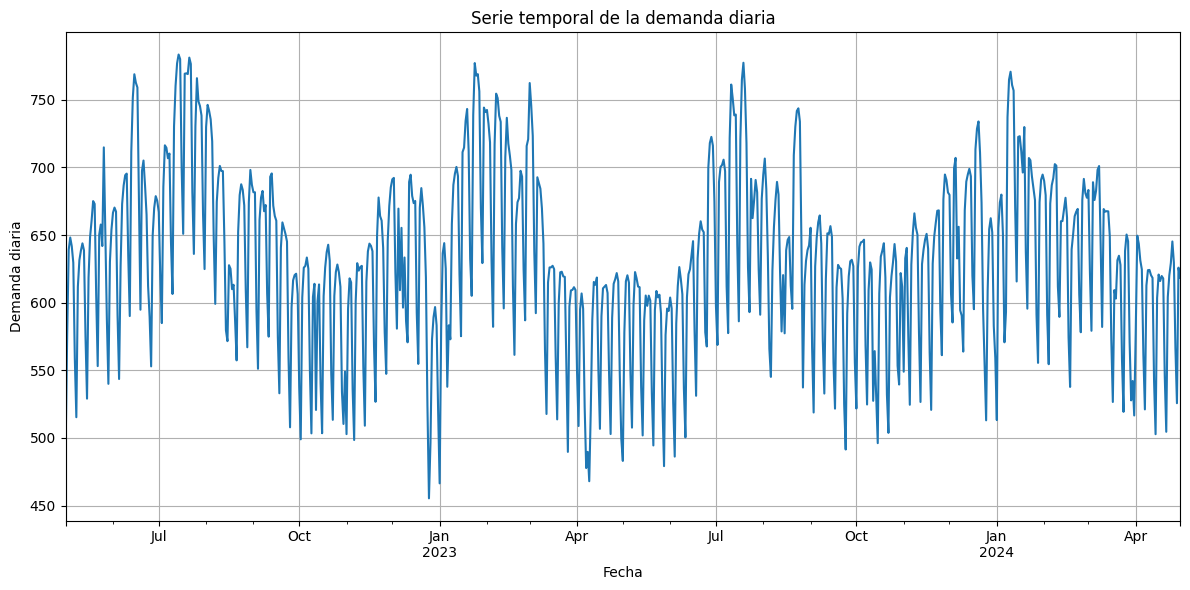

In [ ]:
plt.figure(figsize=(12, 6))
dataset.set_index('Fecha')['Demanda diaria'].plot()
plt.title('Serie temporal de la demanda diaria')
plt.xlabel('Fecha')
plt.ylabel('Demanda diaria')
plt.grid(True)
plt.tight_layout()
plt.show()

En el gráfico podemos observar que en abril,mayo,junio y en octubre y noviembre, es donde la demanda energética siempre es menor, estos meses más o menos corresponder a primavera y otoño, por lo que encontramos un patrón estacional

<ipython-input-42-fb1c24ac2d7d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Mes', y='Demanda diaria', palette='Set3')


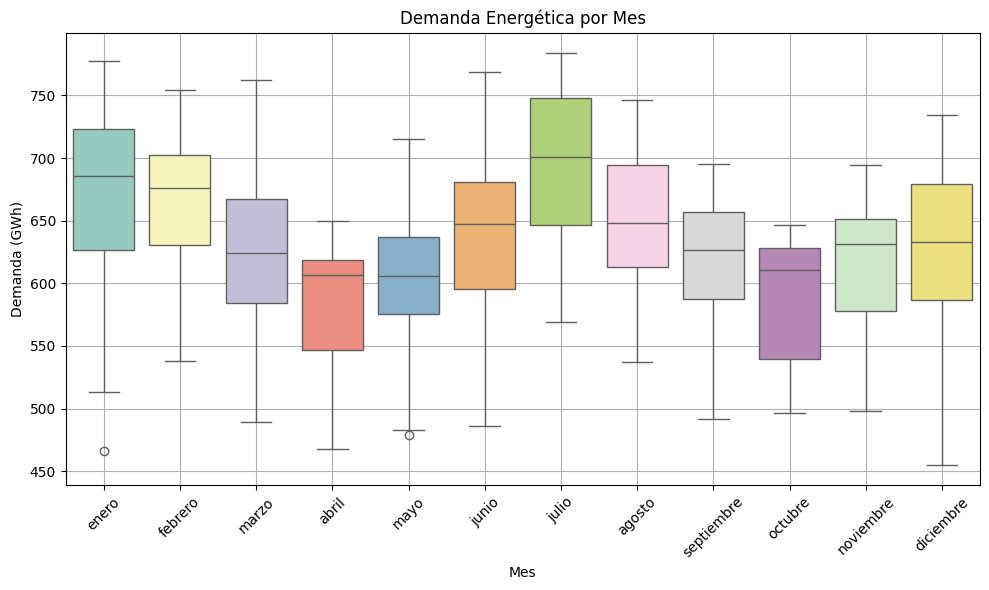

In [ ]:


meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Mes', y='Demanda diaria', palette='Set3')
plt.title('Demanda Energética por Mes')
plt.xlabel('Mes')
plt.ylabel('Demanda (GWh)')
plt.xticks(range(12), meses, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Aqui podemos ver la distribución y variablidad de la demanda energética diaria mes a mes, hay bastante variabilidad, y la diferencia entre los máximos y mínimos es bastante amplia, por lo general, los datos no están muy sesgados, aunque se puede apreciar cierto sesgo negativo en abril octubre y noviembre, esto quiere decir, que hay bastantes más valores por encima de la mediana, en estos meses suele haber más diferencia de temperaturas y más días festivos, por eso puede haber días que se consuma más energía que otros. En junio también hay bastante dispersión en los datos, es cuando empieza el verano y hay dias que la gente pondrá el aire porque hace mucho calos y otros días que no.

<ipython-input-16-38ac16ae1d8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Mes', y='Temperatura Media', palette='Set3')


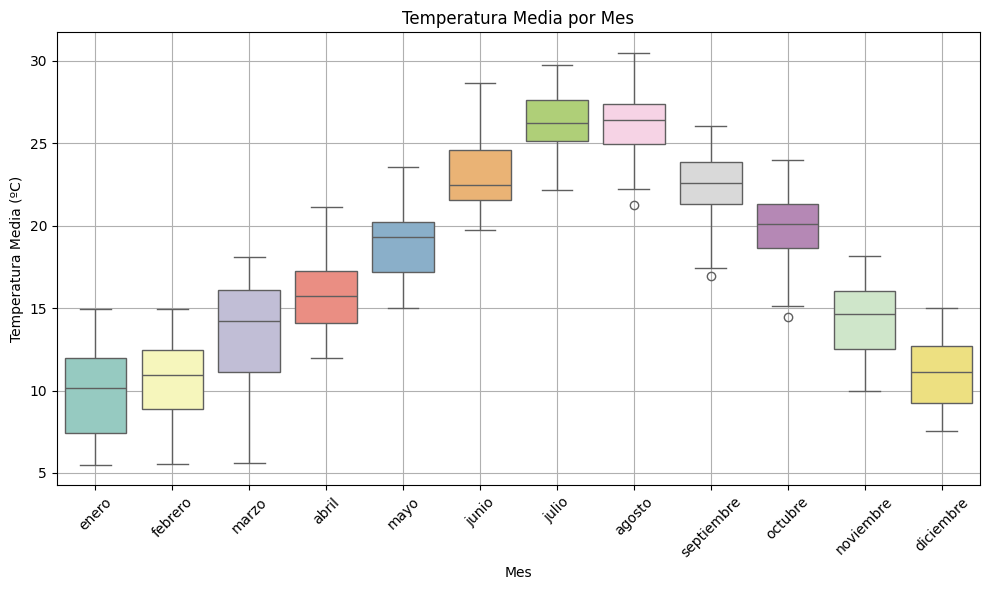

In [ ]:


meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Mes', y='Temperatura Media', palette='Set3')
plt.title('Temperatura Media por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura Media (ºC)')
plt.xticks(range(12), meses, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Aqui podemos ver la distribución y variablidad de la temperatura media diaria mes a mes. Como se puede observar, las cajas por lo general son estrechas por lo que no hay demasiada variabilidad en los datos y los datos más o menos están distribuidos de manera similar a ambos lados de la mediana, donde se aprecia que hay un poco más de sesgo positivo es en junio, que parece haber más datos por debajo de la mediana que por encima. Al ser condiciones climáticas no hay una explicación del por qué los datos están distribuidos de esta manera.

In [13]:
x=dataset[['Día','Mes','Año','Temperatura Media Normalizada']]
y= dataset['Demanda diaria']

In [14]:
#se utiliza para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)#el tamaño del conjunto de prueba será el 30% del tamaño total del conjunto de dato

# REGRESIÓN LINEAL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
linealmodel = LinearRegression()

# Entrenar el modelo
linealmodel.fit(x_train, y_train)

# Hacer predicciones
y_pred = linealmodel.predict(x_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f"Error absoluto medio: {mae}")
print(f"Error cuadrático medio: {mse}")
print(f"R-cuadrado: {r2}")


Error absoluto medio: 50.743015627894295
Error cuadrático medio: 3983.5101277792555
R-cuadrado: -0.010592272250148582


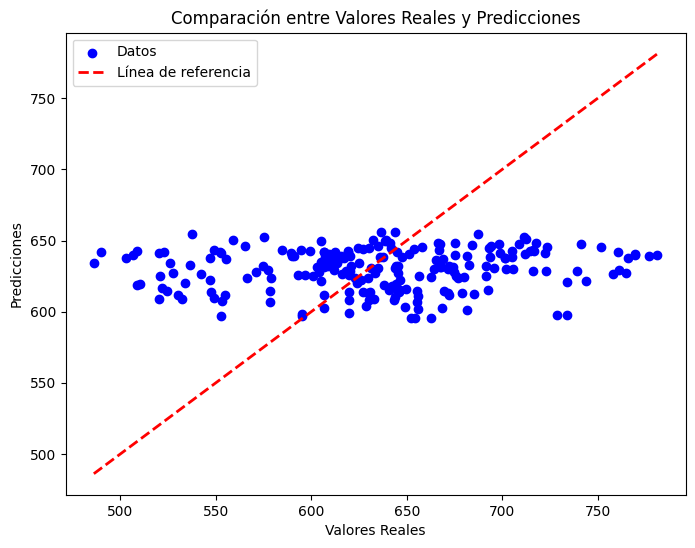

In [ ]:
# Visualización de la predicción y los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

Vemos que la regresión lineal no es muy acertada, teniendo un error absoluto medio de 50.74 se puede ver en el gráfico que eso no es así, además, R^2 es un valor que varía entre 0 y 1 y en este caso es negativo por lo que podemos suponer que este no es el modelo adecuado para la predicción.

In [16]:
# Función para evaluar el rendimiento del modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

def modelPerformance(predictions):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Error absoluto medio: {mae}")
    print(f"Error cuadrático medio: {mse}")
    print(f"R-cuadrado: {r2}")

# KNeighborsRegressor

Min Value uniform : 41.331448302638535 (2)
Min Value distance : 41.06254278333008 (2)


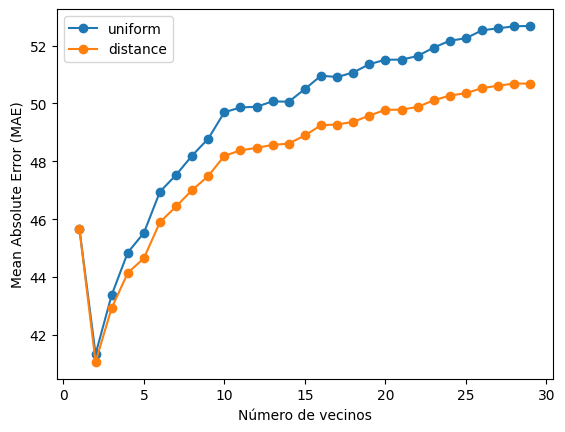

El valor minimo es para k = 2


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
test_errors = []

# KFold cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=0)

# Lista de pesos a probar
weights_options = ['uniform', 'distance']

for weights in weights_options:
    total_scores = []
    for n_neighbors in range(1, 30):
        fold_accuracy = []
        knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        # Verificar cada uno de los modelos con validación cruzada.
        for train_index, test_index in cv.split(x_train):
            # División train test aleatoria
            f_train_x, f_test_x = x_train.iloc[train_index], x_train.iloc[test_index]
            f_train_y, f_test_y = y_train.iloc[train_index], y_train.iloc[test_index]
            # Entrenamiento y ejecución del modelo
            knn.fit(f_train_x, f_train_y)
            y_pred = knn.predict(f_test_x)
            # Evaluación del modelo
            mae = mean_absolute_error(f_test_y, y_pred)
            fold_accuracy.append(mae)
        total_scores.append(np.mean(fold_accuracy))

    plt.plot(range(1, len(total_scores) + 1), total_scores, marker='o', label=weights)
    print('Min Value ' + weights + " : " + str(min(total_scores)) + " (" + str(np.argmin(total_scores) + 1) + ")")

plt.xlabel('Número de vecinos')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()
min_index = total_scores.index(min(total_scores))
print(f"El valor minimo es para k = {min_index + 1}")

Rendimiento del modelo KNN:
Error absoluto medio: 41.162402527013114
Error cuadrático medio: 2771.4215722542394
R-cuadrado: 0.29690721644308193


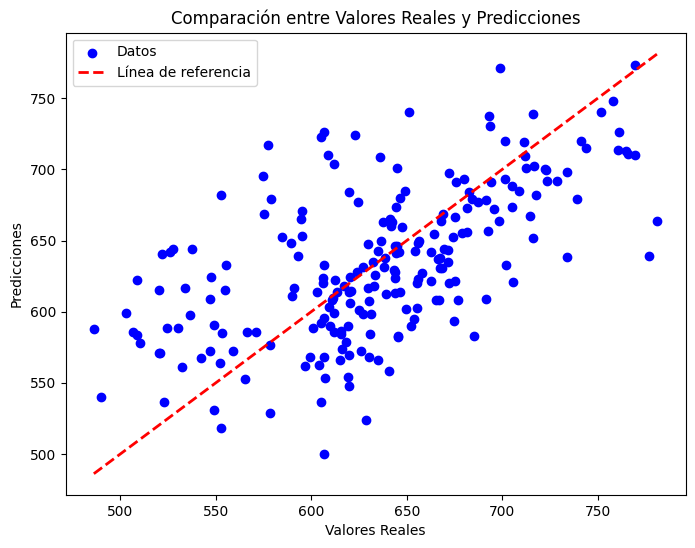

In [18]:
# Definir el número óptimo de vecinos encontrado por el método del codo

n_neighbors = 2
weights = 'distance'

# Crear y ajustar el modelo KNN con el número óptimo de vecinos
knn_model = KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)
knn_model.fit(x_train, y_train)

# Realizar predicciones
y_pred = knn_model.predict(x_test)


# Evaluar el rendimiento del modelo KNN
print("Rendimiento del modelo KNN:")
modelPerformance(y_pred)

# Visualización de la predicción y los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

Podemos observar en el gráfico que es más preciso que el modelo de regresión lineal. El valor de R^2 indica que aproximadamente el 29.69% de la variabilidad en la variable dependiente puede ser explicada por las variables independientes incluidas en el modelo. Los valores reales se ajustan bastante bien a los predichos como se puede ver en la gráfica superior, en la que lo ideal sería que se alinearan en la bisectriz (la recta de referencia)

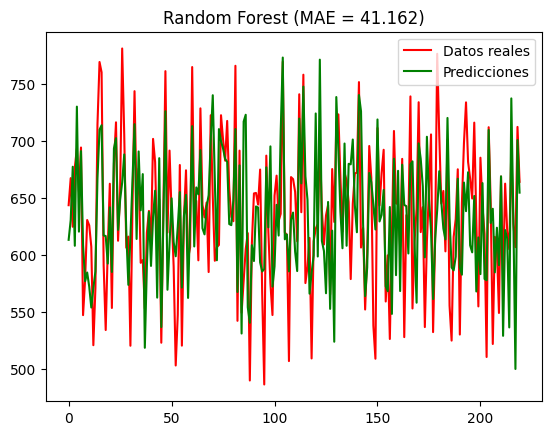

In [ ]:
# Visualizar los resultados
xx = np.arange(len(y_test))
plt.plot(xx, y_test, c='r', label='Datos reales')
plt.plot(xx, y_pred, c='g', label='Predicciones')
mae = mean_absolute_error(y_test, y_pred)
plt.axis('tight')
plt.legend()
plt.title("Random Forest (MAE = %6.3f)" % mae)
plt.show()

En este gráfico tenemos otra manera de representar el ajuste hecho en el modelo para ver la diferencia entre los valores reales y los predichos, fijandonos en el gráfico, la predicción se ajusta bastante bien a los valores reales. Voy a probar ahora a hacer un GridSearch para ver si puedo mejorar el modelo

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Definir el modelo KNN
knn = KNeighborsRegressor()

# Definir el grid de hiperparámetros
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Ajustar el modelo
knn_grid_search.fit(x_train, y_train)

# Mejor modelo encontrado
kneighborsmodel = knn_grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = kneighborsmodel.predict(x_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Best parameters found: {knn_grid_search.best_params_}")

Mean Absolute Error: 41.0589551897057
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [20]:
modelPerformance(y_pred)

Error absoluto medio: 41.0589551897057
Error cuadrático medio: 2757.061817477392
R-cuadrado: 0.3005501988237942


El modelo ha mejorado ligeramente con respecto al modelo KNeighborsRegressor anterior



# SVR

In [ ]:
from sklearn.svm import SVR# se utiliza para construir un modelo de máquinas de vectores de soporte (SVR), que es un algoritmo de aprendizaje supervisado utilizado para regresión
from sklearn.model_selection import GridSearchCV

# Definir el modelo SVR y los parámetros para GridSearchCV
svr = SVR()
param_grid_svr = {"C": [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly']}##Define un diccionario que contiene los nombres de los hiperparámetros que se deben ajustar como claves y las listas de valores correspondientes como valores
gridsvr = GridSearchCV(svr, param_grid_svr, cv=5)

# Ajustar el modelo usando GridSearchCV
gridsvr.fit(x_train, y_train)

# Realizar predicciones
pred_svr = gridsvr.predict(x_test)
print(f"Best parameters found: {gridsvr.best_params_}")

Best parameters found: {'C': 1, 'kernel': 'linear'}


In [ ]:
print("Rendimiento del modelo SVR:")
modelPerformance(pred_svr)

Rendimiento del modelo SVR:
Error absoluto medio: 50.39313113766639
Error cuadrático medio: 3982.6254185787466
R-cuadrado: -0.010367826911102496


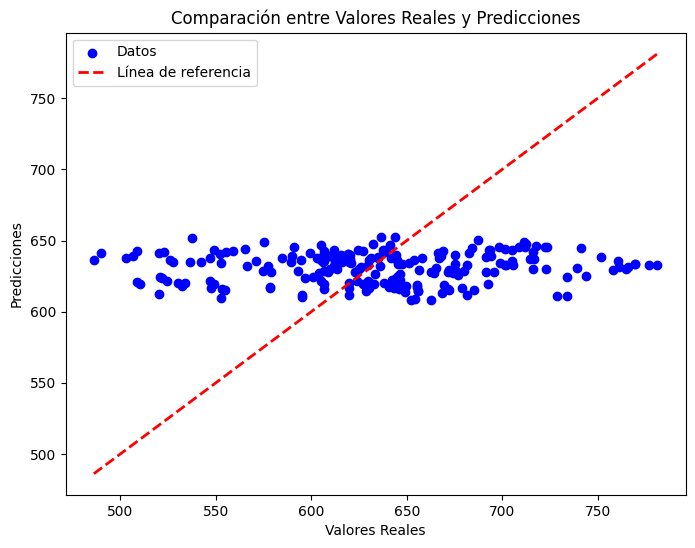

In [ ]:
# Visualización de la predicción y los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_svr, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

El rendimiento de este modelo es peor que el KNN, su error cuadrático medio es más elevado y el R cuadrado es negativo lo que nos indica que el modelo no es el adecuado, además en la gráfica se puede ver como los valores reales y los predichos difieren bastante, si se acercaran deberían estar más alineados con la recta

# RANDOM FOREST

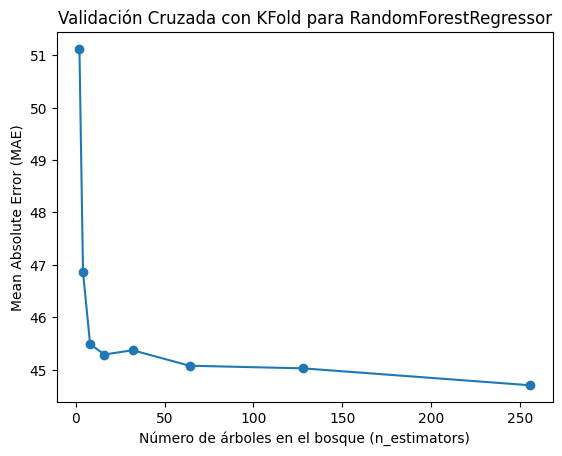

El valor minimo es para 256 estimadores


In [31]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import KFold
# KFold cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=0)

# List of estimators to evaluate
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256]

total_scores = []
for estimators in l_estimators:
    fold_mae = []
    regressor = RandomForestRegressor(n_estimators=estimators, criterion='absolute_error', random_state=0)
    for train_index, test_index in cv.split(x_train):
        # Obtener los datos de entrenamiento y prueba basados en los índices
        f_train_x, f_test_x = x_train.iloc[train_index], x_train.iloc[test_index]
        f_train_y, f_test_y = y_train.iloc[train_index], y_train.iloc[test_index]
        # Entrenar el modelo
        regressor.fit(f_train_x, f_train_y)
        # Predecir
        y_pred = regressor.predict(f_test_x)
        # Evaluar el modelo
        mae = mean_absolute_error(f_test_y, y_pred)
        fold_mae.append(mae)
    total_scores.append(np.mean(fold_mae))

# Graficar los resultados
plt.plot(l_estimators, total_scores, marker='o')
plt.xlabel('Número de árboles en el bosque (n_estimators)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Validación Cruzada con KFold para RandomForestRegressor')
plt.show()
min_index = l_estimators[total_scores.index(min(total_scores))]
print(f"El valor minimo es para {min_index} estimadores")

In [32]:
min_index = l_estimators[total_scores.index(min(total_scores))]
print(f"El valor minimo es para {min_index} estimadores")

El valor minimo es para 256 estimadores


In [33]:
# constructor
randomforestmodel =  RandomForestRegressor(n_estimators= 256, criterion='absolute_error',
                                   random_state=0)
# fit and predict

randomforestmodel.fit( X = x_train, y = y_train)
y_pred = randomforestmodel.predict(X = x_test)
print("Rendimiento del modelo RandomForestRegressor:")
modelPerformance(y_pred)

Rendimiento del modelo RandomForestRegressor:
Error absoluto medio: 44.1695453291239
Error cuadrático medio: 2854.0756640991194
R-cuadrado: 0.27593837644797525


Vemos que el modelo KNN el ligeramente mejor que RandomForest

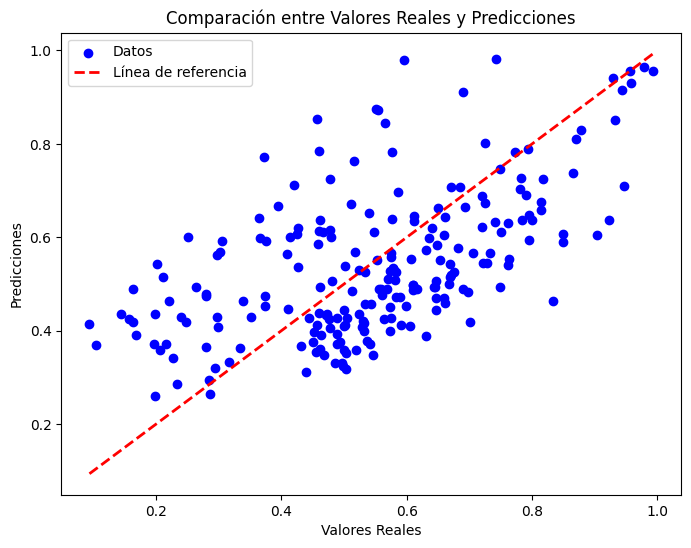

In [ ]:
# Visualización del Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

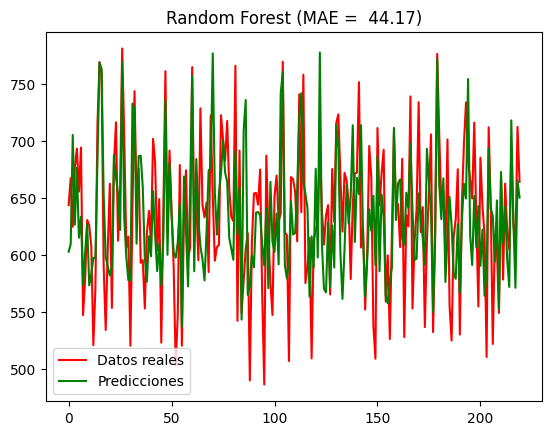

In [ ]:
# Visualizar los resultados
xx = np.arange(len(y_test))
plt.plot(xx, y_test, c='r', label='Datos reales')
plt.plot(xx, y_pred, c='g', label='Predicciones')
mae = mean_absolute_error(y_test, y_pred)
plt.axis('tight')
plt.legend()
plt.title("Random Forest (MAE = %6.2f)" % mae)
plt.show()

In [ ]:
#Para mejorar el modelo anterior voy a usar RandomizedSearch
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir los parámetros para RandomizedSearchCV
param_dist = {
    "n_estimators": [4, 8, 16, 32, 64, 128,256], # Number of trees in random forest
    "max_features": [1.0, 'sqrt'], # Number of features to consider at every split (1.0 is the old 'auto')
    "max_depth": [16, 12, 8, 4, 2, None], # Maximum number of levels in tree
    "min_samples_split": sp_randint(2, 50), # Minimum number of samples required to split a node
    "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
    "bootstrap": [True, False], # Method of selecting samples for training each tree
    "criterion": ["squared_error", "absolute_error"] # Evaluation criterion
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=0,
    n_jobs=-1
)

# Ajustar el modelo RandomizedSearchCV
random_search.fit(x_train, y_train)

# Realizar predicciones con el mejor modelo encontrado
best_model = random_search.best_estimator_
pred_rfr = best_model.predict(x_test)

In [ ]:
#Mejores hiperparámetros:

random_search.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 41,
 'n_estimators': 4}

Al parecer el modelo es el mejor para 4 estimadores y con una profundidad máxima de 8

In [ ]:
print("Rendimiento del modelo RandomForestRegressor:")
modelPerformance(pred_rfr)

Rendimiento del modelo RandomForestRegressor:
Error absoluto medio: 45.06280282439336
Error cuadrático medio: 2756.177785565555
R-cuadrado: 0.3007744723388269


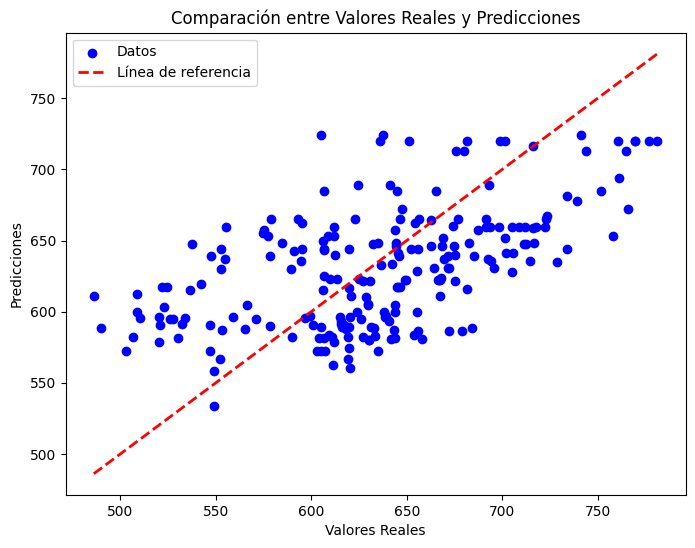

In [ ]:
# Visualización del Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_rfr, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

El resultado es ligeramente peor que antes en cuanto al error cuadrático medio, aunque su R^2 es mejor, dado que lo que me interesa es el modelo que haga la mejor predicción de la demanda, el MAE es el indicador principal. Un MAE más bajo indica que, en promedio, las predicciones están más cerca de los valores reales, lo que es crucial para hacer predicciones precisas de la demanda.
Aunque este modelo tenga un R² más alto, el modelo anterior de RandomForest es ligeramente mejor.

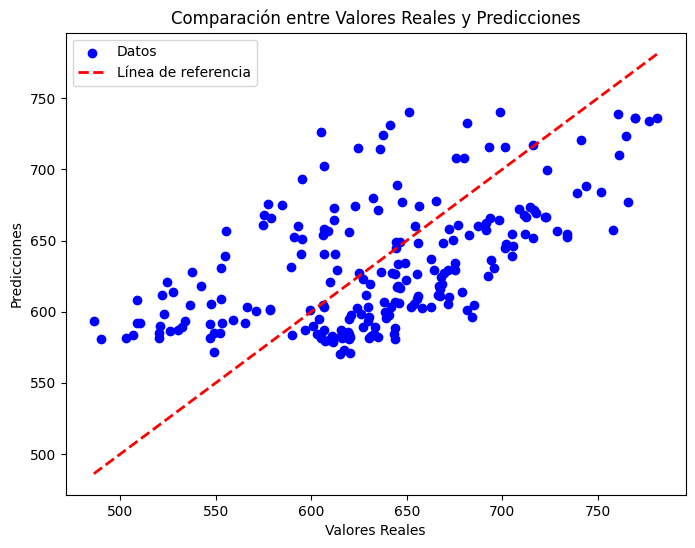

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Crear el modelo RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)



# Definir los parámetros para GridSearchCV alrededor de los mejores encontrados
param_grid = {
              "n_estimators": [2,4,8,16,32,64, 128], # Number of trees in random forest
              "max_features": ['sqrt'], # Number of features to consider at every split (1.0 is the old 'auto')
              "max_depth": [2, 4, 8, 16, 32, 64, 128], # Maximum number of levels in tree
              "min_samples_split": [10, 22, 30], #  Minimum number of samples required to split a node
              "min_samples_leaf": [1, 3, 10], # Minimum number of samples required at each leaf node
              "bootstrap": [False] # Method of selecting samples for training each tree
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = regressor, param_grid= param_grid, cv=5)

# Ajustar el modelo GridSearchCV
grid_search.fit(x_train, y_train)

# Obtener el mejor modelo encontrado
grid_forest = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo encontrado
pred_rfr = grid_forest.predict(x_test)

# Visualización del Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_rfr, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()


In [ ]:
print("Rendimiento del modelo RandomForestRegressor:")
modelPerformance(pred_rfr)

Rendimiento del modelo RandomForestRegressor:
Error absoluto medio: 45.71956565989795
Error cuadrático medio: 2722.934822322224
R-cuadrado: 0.30920800976757057


El modelo sigue siendo peor aún con GridSearch y RandomizedSearch, es posible que esto suceda porque GridSearch y RandomizedSearch funcionan mejor con mayor cantidad de datos y más complejos, además puede que estén haciendo un sobreajuste de los datos


In [ ]:
pip install xgboost


# BOOSTING

Model AB - Mean Absolute Error: 47.6602954083591


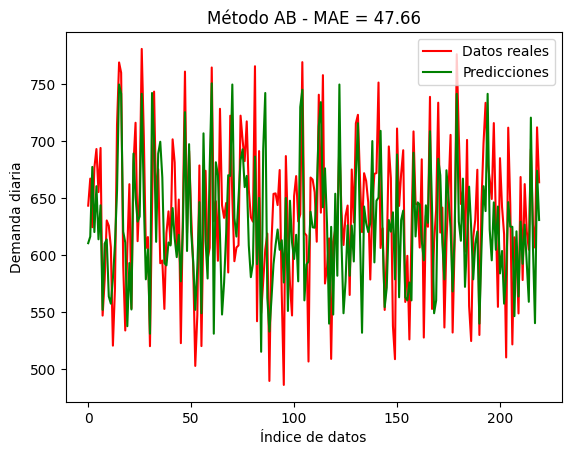

Model GB - Mean Absolute Error: 46.16635663862364


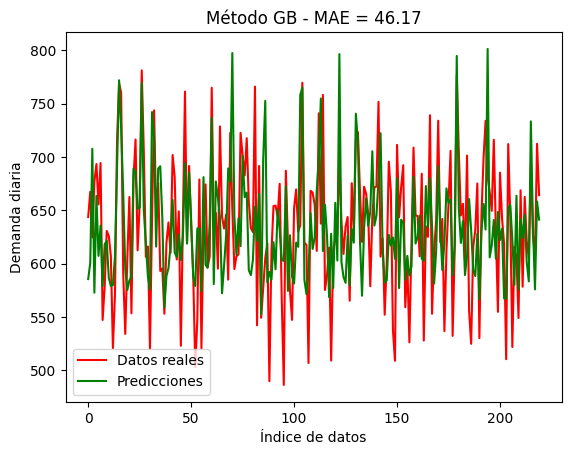

Model XGB - Mean Absolute Error: 46.32624031563722


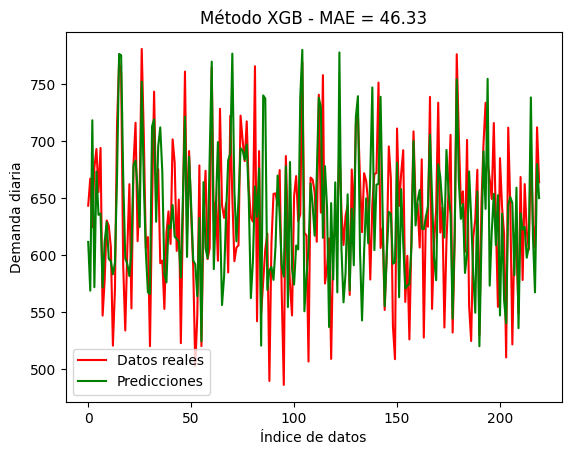

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Modelos de regresión
regressors = []

regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=6, criterion='absolute_error'),
                                    n_estimators=128, random_state=0))
regressors.append(GradientBoostingRegressor(n_estimators=50, learning_rate=0.25,
                                            random_state=0, loss='squared_error'))
regressors.append(XGBRegressor(n_estimators=50, learning_rate=0.25, max_depth=6,
                               random_state=0, objective='reg:squarederror'))

# Nombres de los modelos
regr_names = ["AB", "GB", "XGB"]

# Índices para las predicciones
xx = np.arange(len(x_test))

# Resultados y visualización
for i, r in enumerate(regressors):
    # Ajustar el modelo
    r.fit(X=x_train, y=y_train)

    # Hacer predicciones
    y_pred = r.predict(X=x_test)

    # Evaluar el modelo
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model {regr_names[i]} - Mean Absolute Error: {mae}")

    # Plotear los resultados
    plt.figure()
    plt.plot(xx, y_test, c='r', label='Datos reales')
    plt.plot(xx, y_pred, c='g', label='Predicciones')
    plt.xlabel("Índice de datos")
    plt.ylabel("Demanda diaria")
    plt.title(f"Método {regr_names[i]} - MAE = {mae:.2f}")
    plt.axis('tight')
    plt.legend()
    plt.show()


El mejor modelo del conjunto de modelos es el GradientBoostingRegressor, con un error absoluto medio de 0.1406, sin embargo, sigue siendo mejor modelo el Kneighbors

In [ ]:
# constructor
gradientboost =  GradientBoostingRegressor(n_estimators=50, learning_rate=0.25,
                                            random_state=0, loss='squared_error')
# fit and predict

gradientboost.fit( X = x_train, y = y_train)
y_pred = gradientboost.predict(X = x_test)
print("Rendimiento del modelo Boosting:")
modelPerformance(y_pred)

Rendimiento del modelo Boosting:
Error absoluto medio: 46.16635663862364
Error cuadrático medio: 3157.011215197683
R-cuadrado: 0.19908547106808627


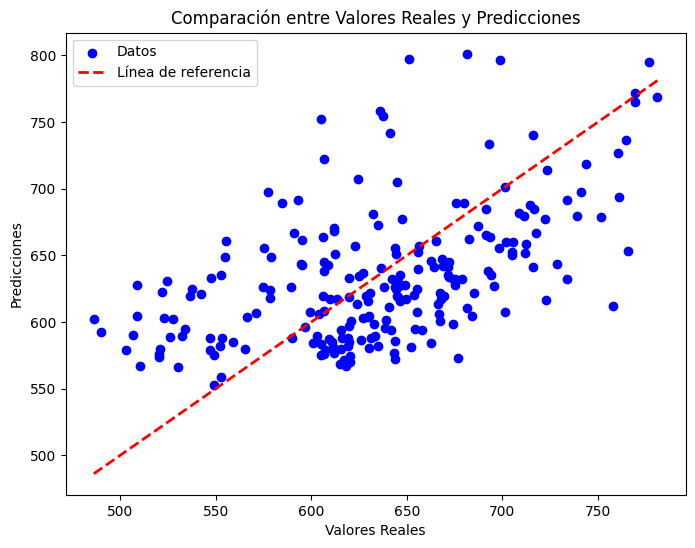

In [ ]:
# Visualización del Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

# CONCLUSIONES

| Modelo | MAE validación | Algoritmo | Hiperparámetros | Descripción
| --- | --- | --- | --- | --- |
| linealmodel | 50.743 | Algoritmo Regresión Lineal | ... | ...
|knn_model | 41. | Algoritmo KneighborsRegressor | 'n_neighbors' = 2, 'weights' = 'distance' | ...
| knn_grid_search | 41.058 | Algoritmo KneighborsRegressor con gridSearch |'metric' = 'manhattan', 'n_neighbors' = 2, 'weights' = 'distance' | ...
| gridsvr |  50.393 |Algoritmo SVR | 'C' =  1, 'kernel' = 'linear' | ...
| randomforestmodel | 44.169 | Algoritmo RandomForest | n_estimators = 256, criterion = 'absolute_error' | ...
| gradientboost | 46.166 | Algoritmo GradientBoostRegressor | n_estimators=50, learning_rate=0.25, random_state=0 , loss='squared_error' | ...

# PREDICCIONES

In [ ]:
import pandas as pd
import zipfile
import os

# Ruta del archivo ZIP
zip_path = '/content/predicciones.zip'

# Directorio temporal para extraer los archivos Excel
temp_dir = '/content/predicciones'

# Crear el directorio temporal si no existe
if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

# Extraer los archivos del ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

# Nombre del archivo donde se guardarán las tablas extraídas
archivo_salida = 'tablas_predicciones.xlsx'

# Lista para almacenar las tablas extraídas
tablas = []

# Recorrer todos los archivos en el directorio temporal
for archivo in os.listdir(temp_dir):
    if archivo.endswith('.xlsx'):
        # Construir la ruta completa del archivo
        ruta_archivo = os.path.join(temp_dir, archivo)
        # Leer la hoja 8 del archivo Excel
        df = pd.read_excel(ruta_archivo, sheet_name='Dat_01')  # De todas las hojas me quedo con la que se llama Dat_01
        n_filas = get_mes(archivo)
        print(n_filas)
        # Extraer las columnas deseadas
        tabla = df.iloc[127:127+n_filas, [0, 3]]  # La columna 0 es "fecha" y la columna 3 es "demanda diaria"
        tabla.columns = ['Fecha', 'Demanda diaria']  # Renombrar columnas si es necesario
        temperatura_media = df.iloc[50:50+n_filas, 2].values
        tabla['Temperatura Media'] = temperatura_media

        #tabla.to_excel(archivo, index=False)
        # Añadir la tabla a la lista de tablas
        tablas.append(tabla)

# Concatenar todas las tablas en un único DataFrame
resultado = pd.concat(tablas, ignore_index=True)
# Limpiar y estandarizar las fechas
resultado['Fecha'] = resultado['Fecha'].str.replace(r'[^0-9/]', '', regex=True)  # Eliminar caracteres no numéricos

resultado['Fecha'] = pd.to_datetime(resultado['Fecha'],dayfirst=True, infer_datetime_format=True, errors='coerce')
resultado['Fecha'] = resultado['Fecha'].dt.date
resultado = resultado.sort_values(by='Fecha', ascending=True)

# Guardar el DataFrame resultante en un nuevo archivo Excel
resultado.to_excel(archivo_salida, index=False)


print(f'Tablas extraídas y guardadas en {archivo_salida}')

In [ ]:
seed = 42  # Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles.

def upload_predicciones(index_fields=None):
  #Esta línea abre un cuadro de diálogo en el navegador para que el usuario seleccione uno o varios archivos para cargar. uploaded es un diccionario donde las claves son los nombres de los archivos y los valores son los contenidos de los archivos en forma de bytes.
    uploaded = files.upload()  # Abre un cuadro de diálogo para cargar archivos desde tu computadora
    for fn in uploaded.keys():  # Itera sobre los archivos cargados
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))  # Imprime el nombre y tamaño del archivo cargado
        df_pred = pd.read_excel(io.BytesIO(uploaded[fn]), index_col=index_fields)  # Lee el archivo .xlsx en un DataFrame de pandas
        return df_pred  # Retorna el DataFrame

In [40]:
# Subir el fichero de las predicciones
predicciones = upload_files()
print(predicciones.shape)
predicciones.head()

Saving tablas_predicciones (1).xlsx to tablas_predicciones (1) (1).xlsx
User uploaded file "tablas_predicciones (1) (1).xlsx" with length 6684 bytes
(61, 3)


,Fecha,Demanda diaria,Temperatura Media
0,2024-05-01,525.080216,13.360
1,2024-05-02,587.727188,13.050
2,2024-05-03,604.437473,14.402
3,2024-05-04,548.875255,17.666
4,2024-05-05,513.686060,17.262


In [41]:
predicciones = pd.DataFrame(predicciones)
# Para asegurar que la columna de fecha está en el formato correcto
predicciones['Fecha'] = pd.to_datetime(predicciones['Fecha'])

In [42]:
predicciones['Día'] = predicciones['Fecha'].dt.day
predicciones['Mes'] = predicciones['Fecha'].dt.month
predicciones['Año'] = predicciones['Fecha'].dt.year

In [ ]:
predicciones.head(5)

,Fecha,Demanda diaria,Temperatura Media,Día,Mes,Año
0,2024-05-01,525.080216,13.360,1,5,2024
1,2024-05-02,587.727188,13.050,2,5,2024
2,2024-05-03,604.437473,14.402,3,5,2024
3,2024-05-04,548.875255,17.666,4,5,2024
4,2024-05-05,513.686060,17.262,5,5,2024


In [43]:
# Normalizar las columnas 'Demanda diaria' y 'Temperatura Media'

predicciones[['Temperatura Media Normalizada']] = scaler.fit_transform(predicciones[['Temperatura Media']])

# Guardar la columna 'Demanda diaria Normalizada' para su uso posterior
demanda_real = predicciones['Demanda diaria']
fecha = predicciones['Fecha']

# Eliminar columnas no deseadas del DataFrame
predicciones.drop(['Fecha', 'Demanda diaria', 'Temperatura Media'], axis=1, inplace=True)


In [44]:
predicciones_may_jun = knn_model.predict(X = predicciones)
mae = mean_absolute_error(demanda_real,predicciones_may_jun)
print(f"MAE: {mae}")

MAE: 46.81222968312531


In [45]:
resultado_final = pd.DataFrame({
    'Fecha': fecha,  # asegurarse de que X_test tenga el indice de fechas originales
    'Prediccion': predicciones_may_jun
})

resultado_final.to_csv('predicciones.csv', index=False)

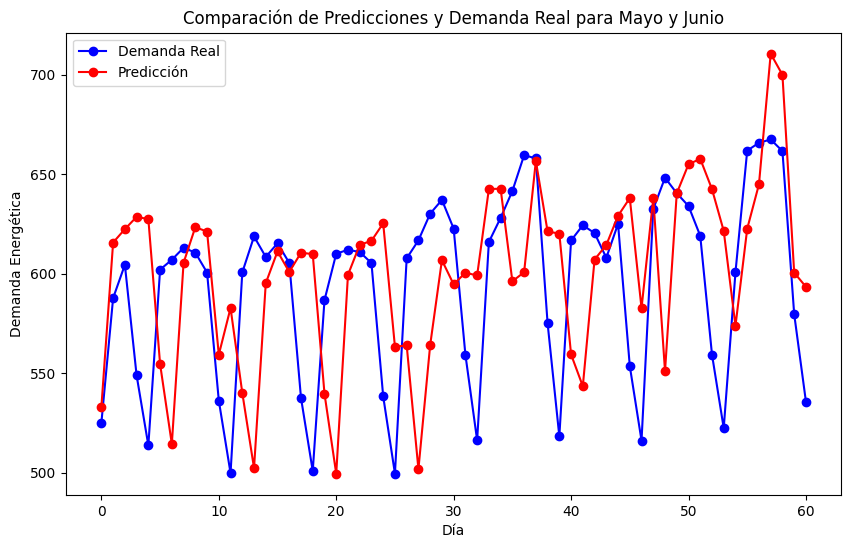

In [46]:
# Visualización de la comparación
plt.figure(figsize=(10, 6))
plt.plot(demanda_real.index, demanda_real, marker='o', linestyle='-', color='blue', label='Demanda Real')
plt.plot(predicciones.index, predicciones_may_jun, marker='o', linestyle='-', color='red', label='Predicción')
plt.xlabel('Día')
plt.ylabel('Demanda Energética')
plt.title('Comparación de Predicciones y Demanda Real para Mayo y Junio')
plt.legend()
plt.show()

# PREDICCIÓN A PETICIÓN

In [ ]:
print("¿Para qué año quieres la predicción?")
año_pred = int(input())

print("¿Para qué mes quieres hacer la predicción de la demanda energética?")
mes_pred = input()
mes_pred = mes_pred.lower()


¿Para qué año quieres la predicción?
2025
¿Para qué mes quieres hacer la predicción de la demanda energética?
abril


In [47]:
from ast import match_case
def get_mes2(mes):
  match mes:
    case 'enero':
      return (31,1)
    case 'febrero':
      bisiesto = es_bisiesto(año_pred)
      if bisiesto == True:
        return (29,2)
      else:
        return (28,2)
    case 'marzo':

      return (31,3)
    case 'abril':

      return (30,4)
    case 'mayo':

      return (31,5)
    case 'junio':

      return (30,6)
    case 'julio':

      return (31,7)
    case 'agosto':

      return (31,8)
    case 'septiembre':

      return (30,9)
    case 'octubre':

      return (31,10)
    case 'noviembre':

      return (30,11)
    case 'diciembre':

      return(31,12)


In [ ]:
dias = get_mes2(mes_pred)

lst_dias = []
lst_mes = []
lst_año = []
lst_temps = []
for i in range(dias[0]):
  lst_dias.append(i)
  lst_mes.append(dias[1])
  lst_año.append(año_pred)



In [ ]:
print(int((dias[0])))

31


In [ ]:
import random

lst_temps =[random.uniform(float(temperaturas[mes_pred][1]),float(temperaturas[mes_pred][0])) for x in range(dias[0])]
print(lst_temps)

[14.883005387309025, 16.80651642617216, 19.484324293876252, 15.276275093602681, 14.721659394264318, 16.325678182410854, 14.890620140589716, 14.676639480545923, 15.854972479067541, 17.173402353385725, 15.271833444051994, 16.780054241239338, 20.456784719641675, 20.557329271101214, 16.54425859323781, 17.15236885559264, 15.632456465327095, 14.63908842685148, 14.605626884932896, 17.2570336595261, 20.234281233921372, 18.670715879177383, 19.203630921928635, 19.092291357021264, 17.49634990416256, 16.918742664118653, 16.211824507862254, 19.27473467428712, 20.686380601558515, 13.637660118290686]


In [ ]:
#prediccion_user = [lst_dias,lst_mes,lst_año, lst_temps]
S1 = pd.Series(lst_dias)
S2 = pd.Series(lst_mes)
S3 = pd.Series(lst_año)
S4 = pd.Series(lst_temps)
d1 = {'Día': S1, 'Mes': S2, 'Año': S3, 'Temperatura Media': S4}
df1 = pd.DataFrame(d1)
#df_pred = pd.DataFrame(prediccion_user, columns = ['Día','Mes','Año','Temperatura Media'])
df1.head(5)

,Día,Mes,Año,Temperatura Media
0,0,4,2025,14.883005
1,1,4,2025,16.806516
2,2,4,2025,19.484324
3,3,4,2025,15.276275
4,4,4,2025,14.721659


In [ ]:
df1[['Temperatura Media Normalizada']] = scaler.fit_transform(df1[['Temperatura Media']])

In [ ]:
df1.drop('Temperatura Media', axis=1,inplace=True)

In [ ]:
pred_user = knn_model.predict(X = df1)


In [ ]:
resultado_final = pd.DataFrame({
    'Fecha': df1.index,  # asegurarse de que X_test tenga el indice de fechas originales
    'Predicción': pred_user
})

# Guardar los resultados en un archivo CSV
resultado_final.to_csv('predicciones_user.csv', index=False)

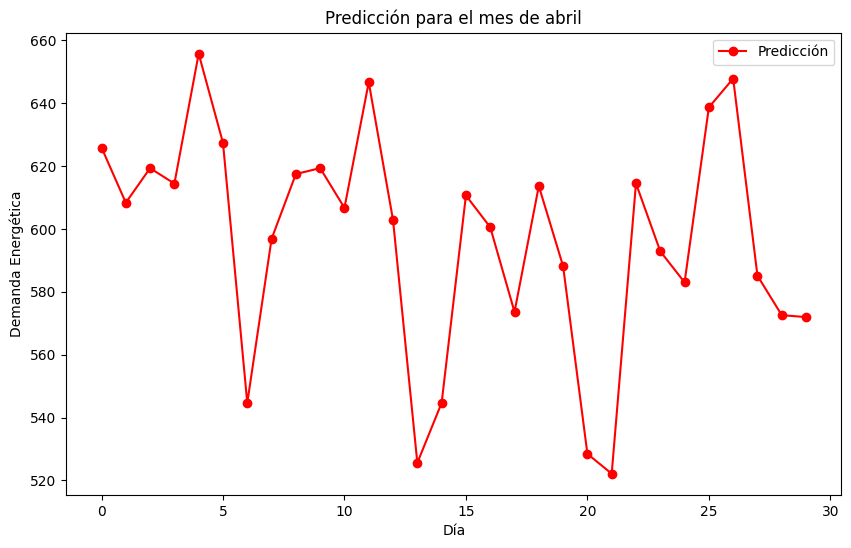

In [ ]:
# Visualización de la comparación
plt.figure(figsize=(10, 6))
plt.plot(df1.index, pred_user, marker='o', linestyle='-', color='red', label='Predicción')
plt.xlabel('Día')
plt.ylabel('Demanda Energética')
plt.title(f'Predicción para el mes de {mes_pred}')
plt.legend()
plt.show()